### Load the Dataset

First of all, we will load the raw banknote dataset using pandas. We will be using the file path from our global constants, and we will prefer feather file over csv because it is more efficient.

In [3]:
import pandas as pd
RAW_FEATHER_DATA_PATH = '../../data/banknote_net.feather'

df = pd.read_feather(RAW_FEATHER_DATA_PATH)
df.head()

,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,...,v_248,v_249,v_250,v_251,v_252,v_253,v_254,v_255,Currency,Denomination
0,0.423395,0.327657,2.568988,3.166228,4.801421,5.531792,2.458083,1.218453,0.000000,1.116785,...,0.000000,2.273451,5.790633,0.000000,0.000000,0.0,5.635400,0.000000,AUD,100_1
1,1.158823,1.669602,3.638447,2.823524,4.839890,2.777757,0.753350,0.764005,0.347871,1.928572,...,0.000000,2.329623,3.516146,0.000000,0.000000,0.0,2.548191,1.053410,AUD,100_1
2,0.000000,0.958235,4.706119,1.688242,3.312702,4.516483,0.000000,1.876461,2.250795,1.883192,...,0.811282,5.591417,1.879267,0.641139,0.571079,0.0,1.861483,2.172145,AUD,100_1
3,0.920511,1.820294,3.939334,3.206829,6.253655,0.942557,2.952453,0.000000,2.064298,1.367196,...,1.764936,3.415151,2.518404,0.582229,1.105192,0.0,1.566918,0.533945,AUD,100_1
4,0.331918,0.000000,3.330771,3.023437,4.369099,5.177336,1.499362,0.590646,0.553625,1.405708,...,0.000000,4.615945,4.825463,0.302261,0.378229,0.0,2.710654,0.325945,AUD,100_1


### Inspect Data Structure

Now, we check the shape, column names, and the data types of the dataframe.

In [4]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print()
print(df.dtypes)

Shape: (24826, 258)

Columns: ['v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'v_15', 'v_16', 'v_17', 'v_18', 'v_19', 'v_20', 'v_21', 'v_22', 'v_23', 'v_24', 'v_25', 'v_26', 'v_27', 'v_28', 'v_29', 'v_30', 'v_31', 'v_32', 'v_33', 'v_34', 'v_35', 'v_36', 'v_37', 'v_38', 'v_39', 'v_40', 'v_41', 'v_42', 'v_43', 'v_44', 'v_45', 'v_46', 'v_47', 'v_48', 'v_49', 'v_50', 'v_51', 'v_52', 'v_53', 'v_54', 'v_55', 'v_56', 'v_57', 'v_58', 'v_59', 'v_60', 'v_61', 'v_62', 'v_63', 'v_64', 'v_65', 'v_66', 'v_67', 'v_68', 'v_69', 'v_70', 'v_71', 'v_72', 'v_73', 'v_74', 'v_75', 'v_76', 'v_77', 'v_78', 'v_79', 'v_80', 'v_81', 'v_82', 'v_83', 'v_84', 'v_85', 'v_86', 'v_87', 'v_88', 'v_89', 'v_90', 'v_91', 'v_92', 'v_93', 'v_94', 'v_95', 'v_96', 'v_97', 'v_98', 'v_99', 'v_100', 'v_101', 'v_102', 'v_103', 'v_104', 'v_105', 'v_106', 'v_107', 'v_108', 'v_109', 'v_110', 'v_111', 'v_112', 'v_113', 'v_114', 'v_115', 'v_116', 'v_117', 'v_118', 'v_119',

### Check for Missing Values and Duplicates

Here, we check for missing and duplicates values to filter them out or add values to them as per need as it is an essential aspect of data preprocessing.

In [5]:
print('Missing values per column:\n', df.isnull().sum(), sep='')
print('\nNumber of columns with missing values: ', df.isnull().sum().sum())
print('\nNumber of duplicate rows:', df.duplicated().sum())

Missing values per column:
v_0             0
v_1             0
v_2             0
v_3             0
v_4             0
               ..
v_253           0
v_254           0
v_255           0
Currency        0
Denomination    0
Length: 258, dtype: int64

Number of columns with missing values:  0

Number of duplicate rows: 125


### Basic Statistics

Now, we look at some statistics summary for the feature columns of the dataframe.

In [6]:
feature_cols = [col for col in df.columns if col.startswith('v_')]
df[feature_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
v_0,24826.0,0.808531,1.141645,0.0,0.000000,0.168668,1.354314,9.567956
v_1,24826.0,1.107391,1.206383,0.0,0.000000,0.726107,1.944035,6.344717
v_2,24826.0,1.830695,1.496633,0.0,0.450423,1.675694,2.931360,7.303446
v_3,24826.0,1.130153,1.230408,0.0,0.000000,0.777994,1.906417,8.156757
v_4,24826.0,1.483436,1.530748,0.0,0.000000,1.132208,2.503288,9.987051
...,...,...,...,...,...,...,...,...
v_251,24826.0,1.185761,1.459957,0.0,0.000000,0.611140,1.989107,10.837153
v_252,24826.0,0.849272,1.113067,0.0,0.000000,0.395196,1.390763,7.452745
v_253,24826.0,0.938010,1.164790,0.0,0.000000,0.490789,1.533044,8.112481
v_254,24826.0,0.867491,1.111109,0.0,0.000000,0.320224,1.508649,6.623214


### Feature Distributions

Here, we plot the histograms for a few sample features to understand their distributions.

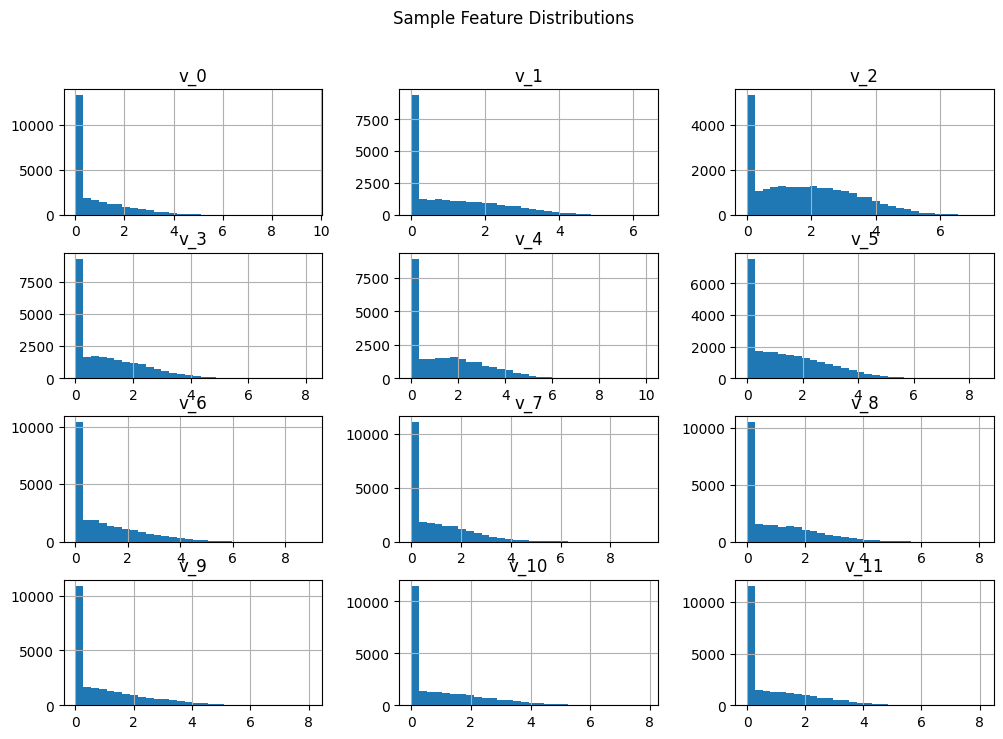

In [7]:
import matplotlib.pyplot as plt

sample_features = feature_cols[:12]
df[sample_features].hist(figsize=(12, 8), bins=30)
plt.suptitle("Sample Feature Distributions")
plt.show()

### Label Distribution

Here, we see the data distribution of the label columns by checking how many values we have for each currency and denomination.

Currency value counts:
Currency
TRY    2888
BRL    2078
INR    1921
EUR    1905
JPY    1658
AUD    1616
USD    1604
MYR    1202
IDR    1164
PHP    1164
CAD    1162
NZD    1156
PKR    1131
MXN    1122
GBP    1108
SGD    1015
NNR     932
Name: count, dtype: int64

Denomination value counts:
Denomination
100_1       1790
50_1        1726
100_2       1678
50_2        1667
10_2        1508
10_1        1485
20_1        1482
5_1         1476
20_2        1436
5_2         1371
200_1        760
200_2        736
1000_1       676
1000_2       474
5000_1       447
2000_2       428
2_1          415
2000_1       410
2_2          392
5000_2       380
1_2          326
1_1          317
500_1        270
500_2        263
10_2_2       190
10_2_1       190
10000_1      175
20_1_1       161
20_2_1       158
20_1_2       141
20_2_2       135
10000_2      126
200_1_1      116
10_1_2       109
500_1_1      103
500_2_1      102
100000_2      97
100000_1      97
50000_1       97
50000_2       97
20000_2       97


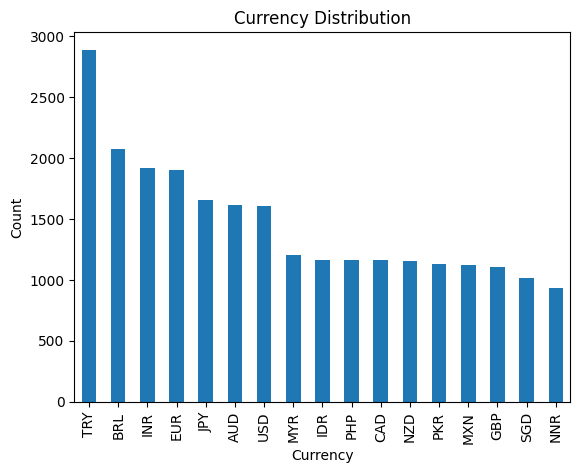

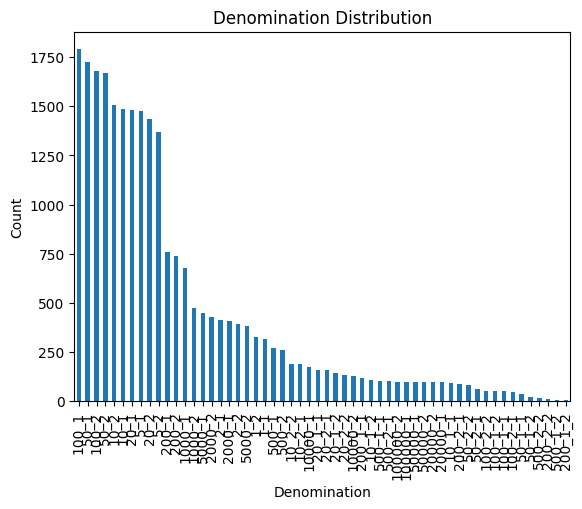

In [8]:
print("Currency value counts:\n", df['Currency'].value_counts(), sep='')
print("\nDenomination value counts:\n", df['Denomination'].value_counts(), sep='')

df['Currency'].value_counts().plot(kind='bar', title='Currency Distribution')
plt.ylabel('Count')
plt.show()

df['Denomination'].value_counts().plot(kind='bar', title='Denomination Distribution')
plt.ylabel('Count')
plt.show()

### Feature Correlation

Now, we check the correlation of the features.

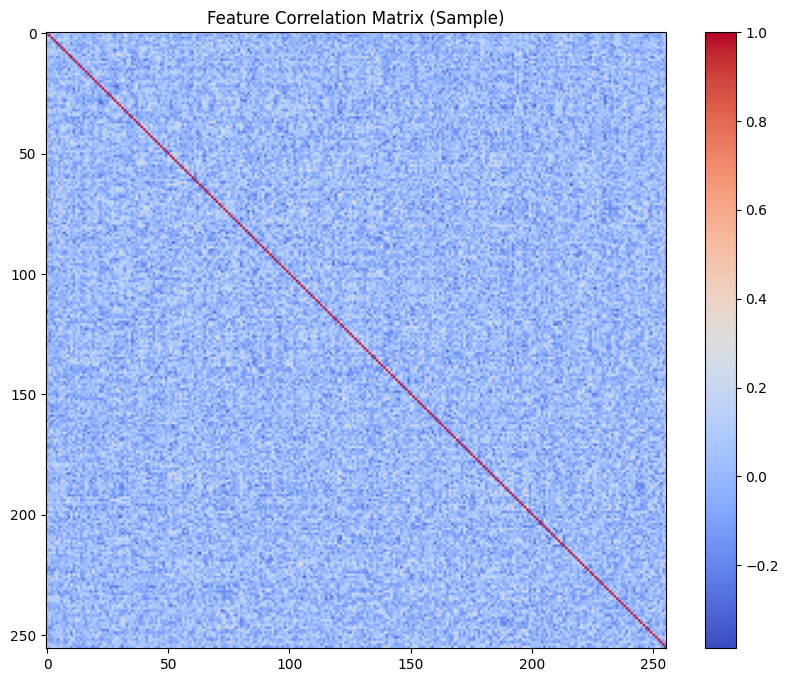

In [9]:
corr_matrix = df[feature_cols].corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title("Feature Correlation Matrix (Sample)")
plt.show()

### Observations

I will write the conclusion here alik paxi hehehe...